/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


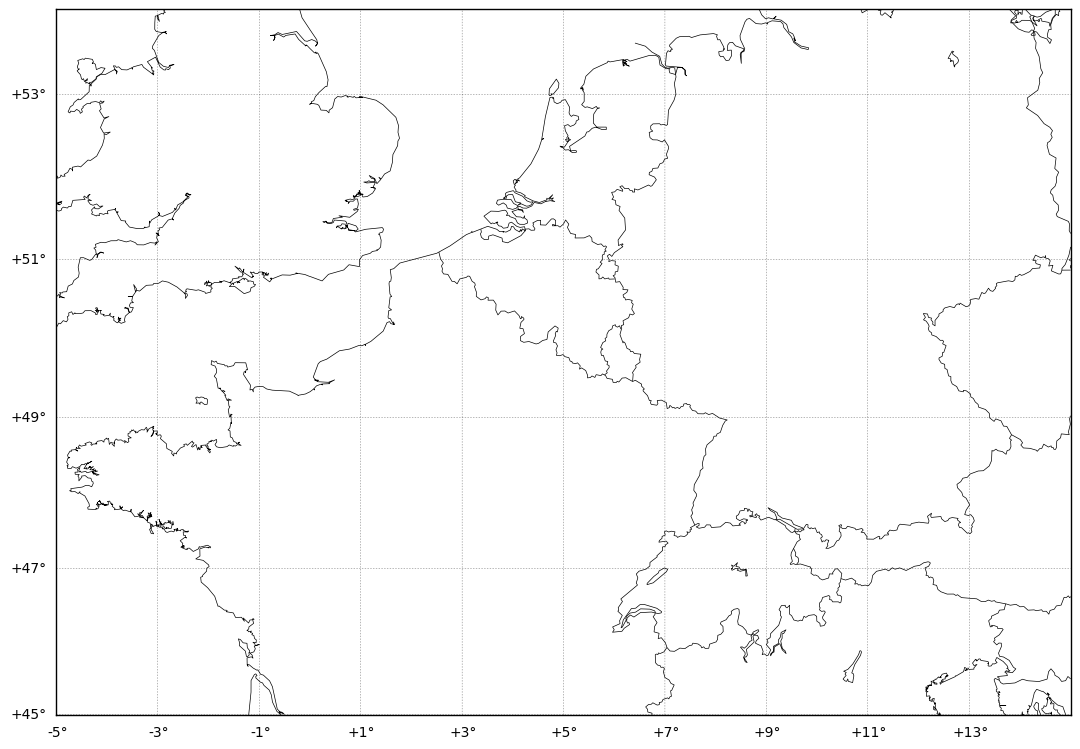

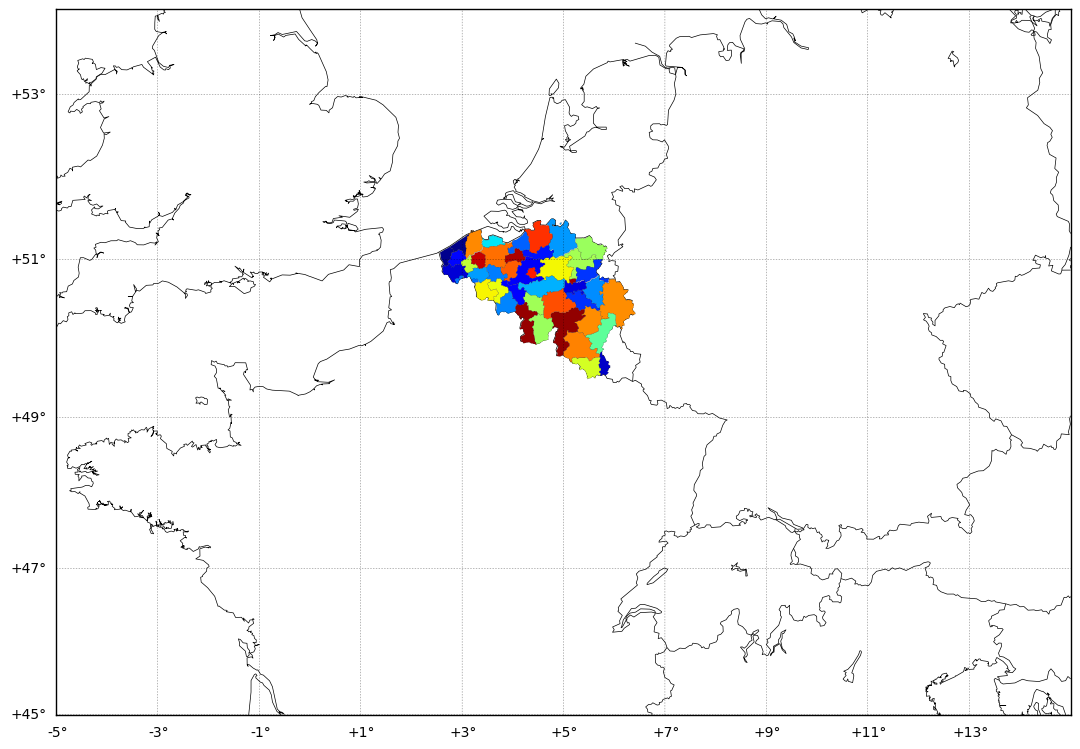

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
 
### PARAMETERS FOR MATPLOTLIB :
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.
 
fig = plt.figure(figsize=(11.7,8.3))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -5.0
x2 = 15.
y1 = 45.
y2 = 54.
 
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',labelstyle='+/-',linewidth=0.2) # draw parallels
m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',labelstyle='+/-',linewidth=0.2) # draw meridians
 
from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile
 
r = shapefile.Reader(r"belgium/BEL_adm3")
shapes = r.shapes()
records = r.records()
 
for record, shape in zip(records,shapes):
    lons,lats = zip(*shape.points)
    data = np.array(m(lons, lats)).T
 
    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])
 
    lines = LineCollection(segs,antialiaseds=(1,))
    lines.set_facecolors(cm.jet(np.random.rand(1)))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)
 
plt.savefig('tutorial10.png',dpi=300)
plt.show()